In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("HeightVsWeight.csv")

In [3]:
data

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [4]:
data.isnull().any()

Age       False
Height    False
dtype: bool

In [5]:
data.shape

(71, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
Age       71 non-null int64
Height    71 non-null int64
dtypes: int64(2)
memory usage: 1.2 KB


In [7]:
data.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


In [8]:
X = data['Age']
y = data['Height']

In [9]:
print(X[5])
print(y[5])

15
139


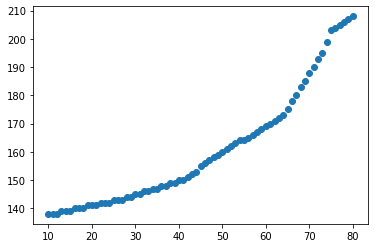

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [12]:
X = X.values.reshape(-1, 1)

In [13]:
X.shape

(71, 1)

In [14]:
X_poly = poly_features.fit_transform(X)

In [15]:
X[0]

array([10], dtype=int64)

In [16]:
X_poly[0]

array([ 10., 100.])

In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

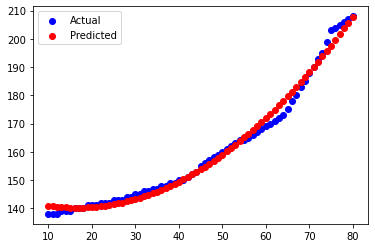

In [19]:
plt.scatter(X, y, color = 'blue', label = 'Actual')
plt.scatter(X, lin_reg.predict(X_poly), color = 'red', label = 'Predicted')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y, lin_reg.predict(X_poly))

0.9903587947714737